In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
dt=pd.read_csv('data/winequality.csv')
dt.describe().round(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.3,0.5,0.3,2.5,0.1,15.9,46.5,1.0,3.3,0.7,10.4,5.6
std,1.7,0.2,0.2,1.4,0.0,10.5,32.9,0.0,0.2,0.2,1.1,0.8
min,4.6,0.1,0.0,0.9,0.0,1.0,6.0,1.0,2.7,0.3,8.4,3.0
25%,7.1,0.4,0.1,1.9,0.1,7.0,22.0,1.0,3.2,0.6,9.5,5.0
50%,7.9,0.5,0.3,2.2,0.1,14.0,38.0,1.0,3.3,0.6,10.2,6.0
75%,9.2,0.6,0.4,2.6,0.1,21.0,62.0,1.0,3.4,0.7,11.1,6.0
max,15.9,1.6,1.0,15.5,0.6,72.0,289.0,1.0,4.0,2.0,14.9,8.0


In [3]:
from sklearn.preprocessing import MinMaxScaler
Sclr=MinMaxScaler(feature_range=(1,5))
qual=np.array(dt['quality'])
dt['quality']=Sclr.fit_transform(qual.reshape(-1,1))

We imported the MinMaxScaler and created our  Sclr object of the class. We passed the scale in  the feature_range parameter i.e. 1-5. Then we  created a numpy array of the quality feature. Then  we scaled the data using the fit_transform()  function. Note that we passed the reshaped array  using the reshape(-1,1) function which will  convert the 1-D array [5,6,7,...] to 2-D array  [[5],[6],[7],...] 

Now we can split the data, create our linear  regressor and train it 



In [4]:
X=dt.drop(columns='quality')
y=dt['quality']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.1)

Reg=LinearRegression()
Reg.fit(X_train,Y_train)

LinearRegression()

MAE: 0.4617897071869109 
 Max RE: 1.7784678673045597


<AxesSubplot: >

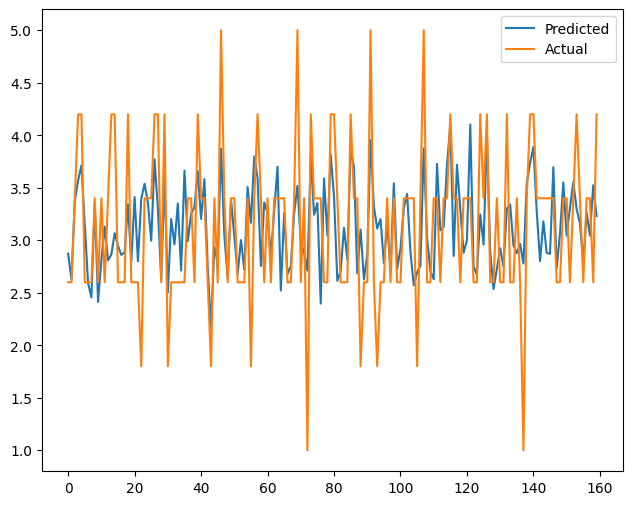

In [5]:
predY=Reg.predict(X_test)
mae=metrics.mean_absolute_error(Y_test,predY)
err=metrics.max_error(Y_test,predY)
cmp=pd.DataFrame({'Predicted':predY,
                  'Actual':Y_test.values})
print('MAE:',mae,'\n','Max RE:',err)
cmp.plot(figsize=(7.5,6))

By observing the graph we can tell  that our model didn’t rated 5 to any input whereas the actual values have only 3 times. The distribution of higher values is  low therefore prediction of higher rating is also  low.



In [6]:
batch=pd.read_csv('data/wine_batch.csv')
batch_pred=Reg.predict(batch.values)
batch_pred.mean()

/Users/jigishap/.pyenv/versions/Movie_Recommender/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3.1255835398009184

We imported the batch dataset and passed the values for predictions. And at average the rating is 3.14 and  if we take MAE(0.43) the rating could be also 2.71  or 3.57. But in all of the cases the average rating  of the batch is higher than 2.5 so it is fine! 
 